In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
glaxo = pd.read_csv('/content/GLAXO.csv')
beml = pd.read_csv('/content/BEML.csv')

In [5]:
glaxo.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [6]:
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [7]:
glaxo_df = glaxo[['Date', 'Close']]
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [8]:
beml_df = beml[['Date','Close']]
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [9]:
# The dataframes have a date column, so we can create DatetimeIndex for this date column. This will ensure that rowd are sorted by time in ascending order.
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

Text(0.5, 1.0, 'Glaxo')

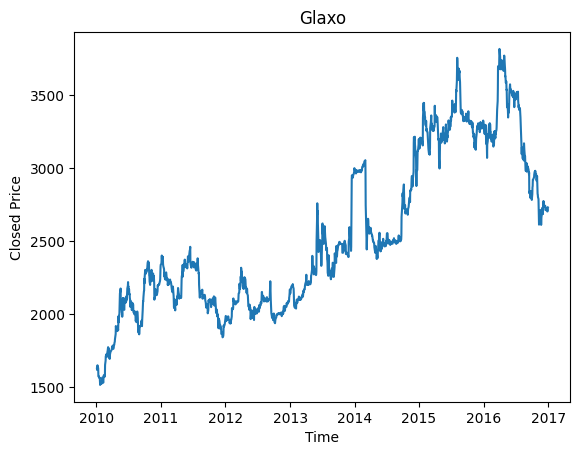

In [10]:
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel ('Closed Price')
plt.title("Glaxo")

Text(0.5, 1.0, 'BEML')

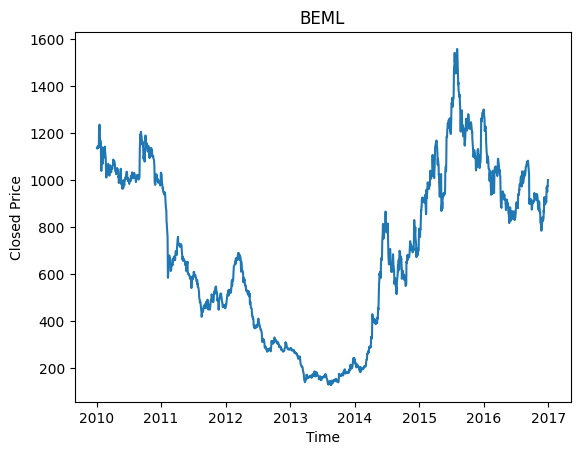

In [11]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Closed Price')
plt.title('BEML')

In [12]:
#using method pct_change() in pandas,this method will give percent change in a column value shifted by a period, which is passed as a parameter.
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)
beml_df['gain']=beml_df.Close.pct_change(periods =1)

In [13]:
glaxo_df = glaxo_df.dropna()
beml_df =beml_df.dropna()

Text(0.5, 1.0, 'Glaxo')

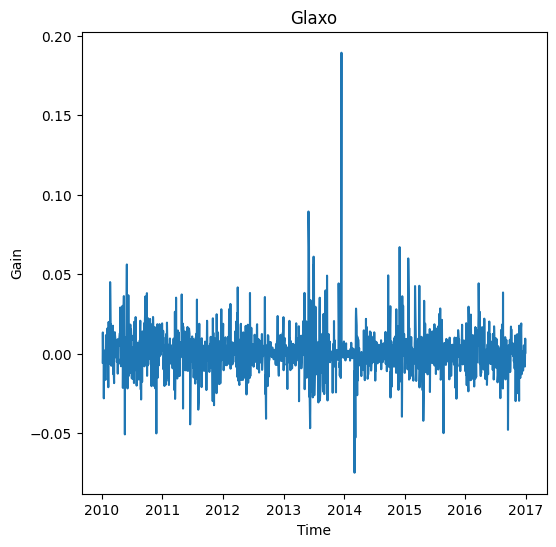

In [14]:
#Plot the gain
plt.figure(figsize=(6,6))
plt.plot(glaxo_df.index,glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('Gain')
plt.title('Glaxo')

Text(0.5, 1.0, 'Beml')

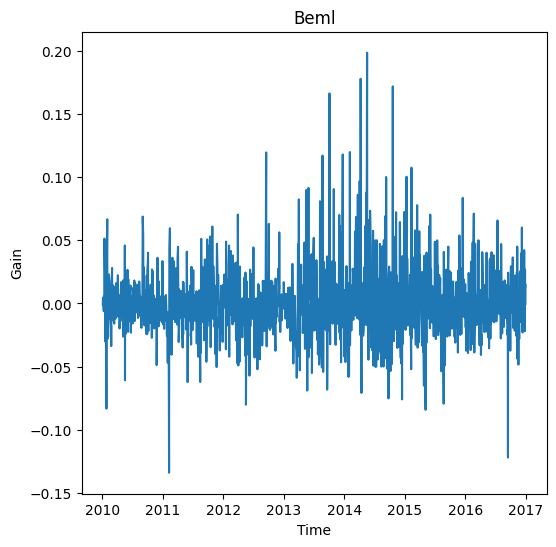

In [15]:
plt.figure(figsize=(6,6))
plt.plot(beml_df.index,beml_df.gain)
plt.xlabel('Time')
plt.ylabel('Gain')
plt.title('Beml')

<ipython-input-16-5f40d9737ec6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glaxo_df.gain, label ='Glaxo')


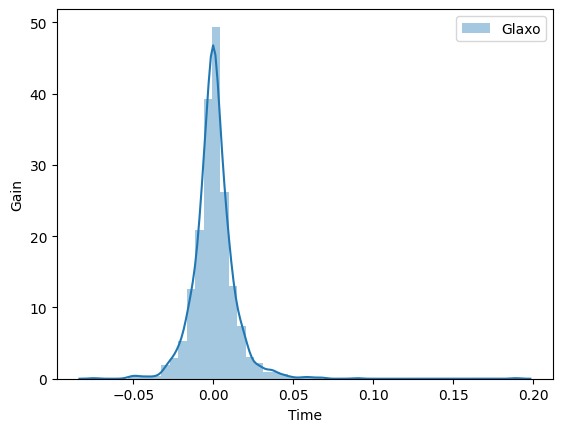

In [16]:
#Distribution plots
sns.distplot(glaxo_df.gain, label ='Glaxo')
plt.xlabel('Time')
plt.ylabel('Gain')
plt.legend()

<ipython-input-17-fff57d9609f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beml_df.gain, label ='Beml')


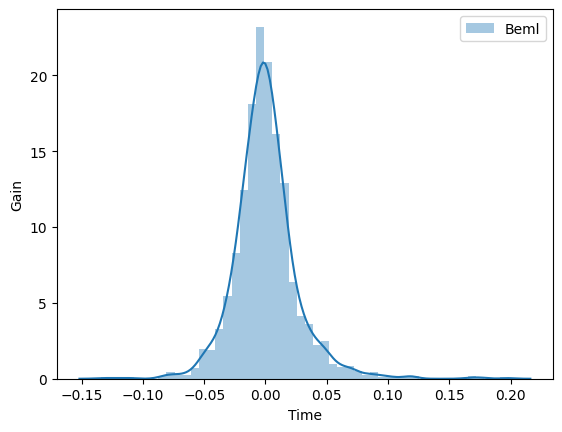

In [17]:
sns.distplot(beml_df.gain, label ='Beml')
plt.xlabel('Time')
plt.ylabel('Gain')
plt.legend()

In [18]:
mean_glaxo = glaxo_df.gain.mean().round(4)
print(mean_glaxo)

0.0004


In [19]:
std_glaxo =glaxo_df.gain.std().round(4)
print(std_glaxo)

0.0134


In [20]:
mean_beml = beml_df.gain.mean().round(4)
print(mean_beml)

0.0003


In [21]:
std_beml = beml_df.gain.std().round(4)
print(std_beml)

0.0264


The expected daily rate of return (gain) is around 0% for both the stocks. The standard deviation or variance of gain indicates risk. Therefore, one can conclude that Beml stock has a higher risk.

In [22]:
#Probability of making 2% or higher loss in glaxo
stats.norm.cdf(-0.02,loc=glaxo_df.gain.mean(),scale = glaxo_df.gain.std())

0.06352488667177401

In [23]:
#Probability of making 2% or higher loss in beml
stats.norm.cdf(-0.02,loc=beml_df.gain.mean(),scale = beml_df.gain.std())

0.22155987503755292

Beml has more probability of making 2% or higher loss

In [24]:
#Probability of making a daily return of 2% or more in glaxo
1- stats.norm.cdf(0.02,loc=glaxo_df.gain.mean(),scale = glaxo_df.gain.std())

0.07104511457618568

In [25]:
##Probability of making a daily return of 2% or more in beml
1- stats.norm.cdf(0.02,loc=beml_df.gain.mean(),scale = beml_df.gain.std())

0.22769829484075355

Beml has higher probability of making a daily return of 2% or more.